# CMB angular power spectrum

The goal of this notebook is to explain the Cosmic Microwave Background angular power spectrum.

In order to plot the CMB map, we need an extra python package healpy, https://healpy.readthedocs.io/en/latest/. We can install this package using pip install healpy.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from matplotlib import animation

## Load CMB maps from the WMAP

The temperature map is in the HEALPix format. Please see this webpage for the details, https://healpix.jpl.nasa.gov/index.shtml

HEALPix is a genuinely curvilinear partition of the sphere into exactly equal area quadri- laterals of varying shape.

In [2]:
wmap_map_I = hp.read_map("/home/chunshen/Desktop/CMB_maps/wmap_band_iqumap_r9_7yr_W_v4.fits")

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/home/chunshen/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


The CMB maps are usually presented using the Mollweide projection. https://en.wikipedia.org/wiki/Mollweide_projection

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


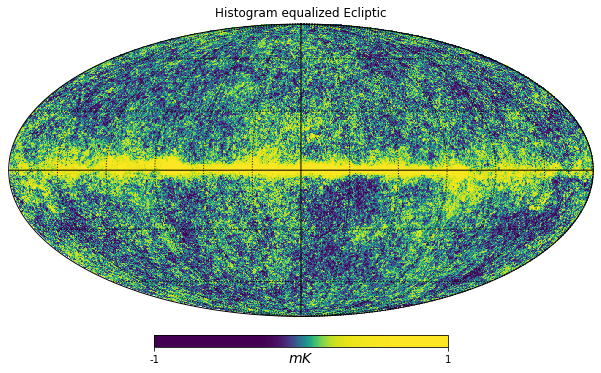

In [3]:
hp.mollview(
    wmap_map_I,
    title="Histogram equalized Ecliptic",
    unit="$mK$",
    norm="hist",
    min=-1,
    max=1,
)
hp.graticule()

In [4]:
# load mask to filter out the Milky Way

mask = hp.read_map(
    "/home/chunshen/Desktop/CMB_maps/wmap_temperature_analysis_mask_r9_7yr_v4.fits").astype(np.bool)
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


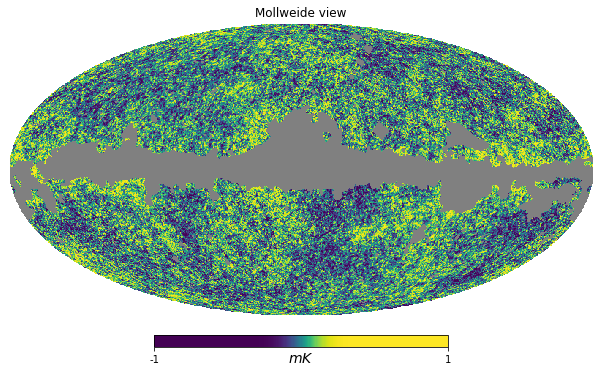

In [5]:
hp.mollview(wmap_map_I_masked.filled(),
            unit="$mK$",
            norm="hist",
            min=-1,
            max=1)

In [8]:
# now we compute the power spectrum C_l
LMAX = 1024
cl = hp.anafast(wmap_map_I_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

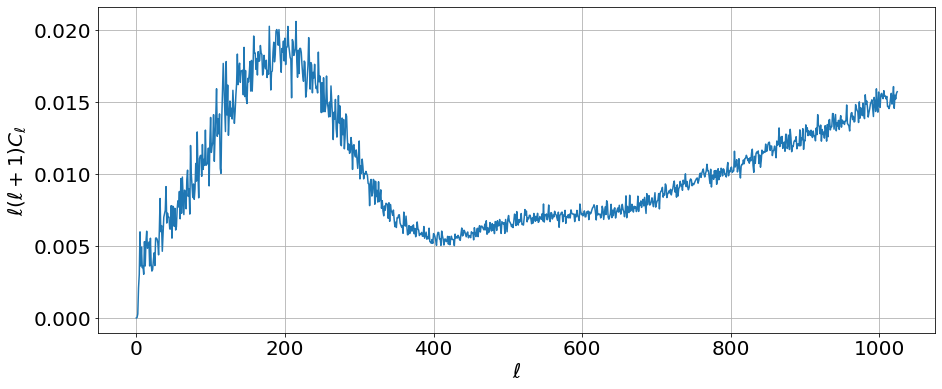

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("$\ell$", fontsize=20)
plt.ylabel("$\ell(\ell+1)C_{\ell}$", fontsize=20)
plt.grid()

## Now, we want to construct the CMB map from a given power spectrum

This part is reference from the github repository, https://github.com/cbischoff/cmb-notebook. 

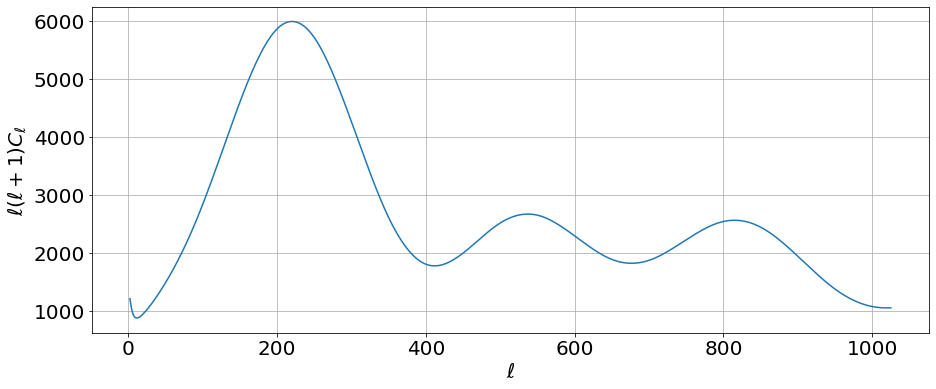

In [10]:
# Read angular power spectrum from file (generated with CAMB via LAMBDA web interface).
Dl = np.loadtxt('./camb_72686694_lensedcls.dat')
# Convert from D_ell to C_ell.
Cl = Dl[:, 1]*2.0*np.pi/Dl[:,0]/(Dl[:,0] + 1.0)
plt.figure(figsize=(15, 6))
plt.plot(Dl[:1024,0], Dl[:1024, 1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("$\ell$", fontsize=20)
plt.ylabel("$\ell(\ell+1)C_{\ell}$", fontsize=20)
plt.grid()

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


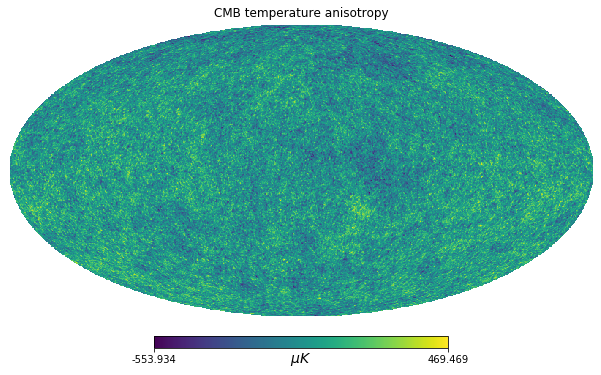

In [11]:
# Create map and plot.
# the resoultion of the map is controlled by the NSIDE parameter.
# N_pix = 12*(NSIDE**2.)
# Here we set it to NSIDE = 512. It will generate 3,145,728 on the sphere.
# One can call hp.nside2npix(NSIDE) to get the number of pixel for a given NSIDE.
# Finally, we use mollview to project the sphere to a 2D plot.
Tmap = hp.synfast(Cl, 512, pol=False, new=True)
hp.mollview(Tmap, unit='$\mu K$', title='CMB temperature anisotropy')
plt.savefig("test.png")

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


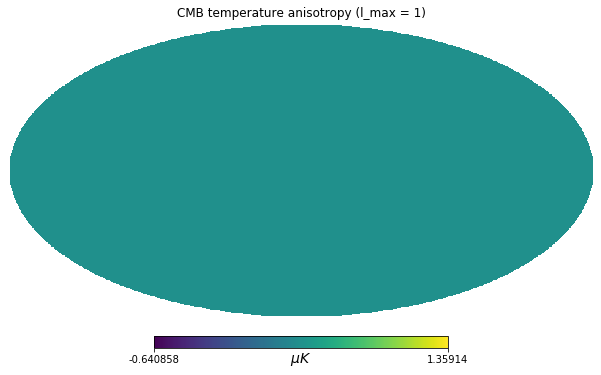

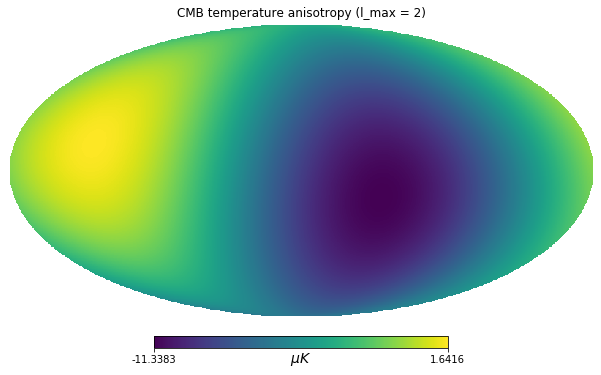

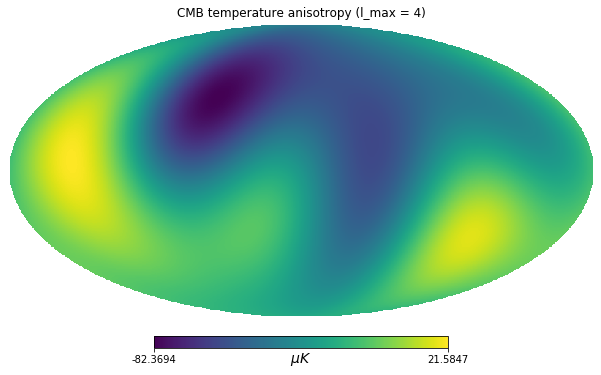

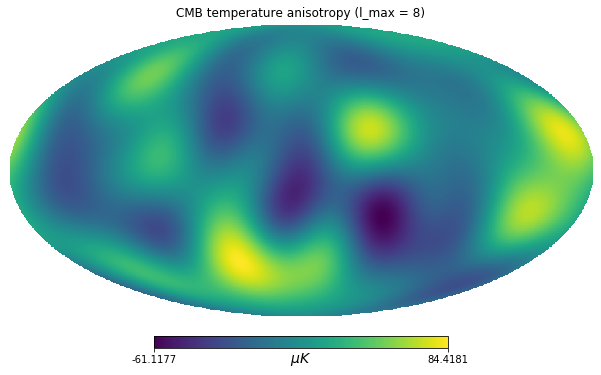

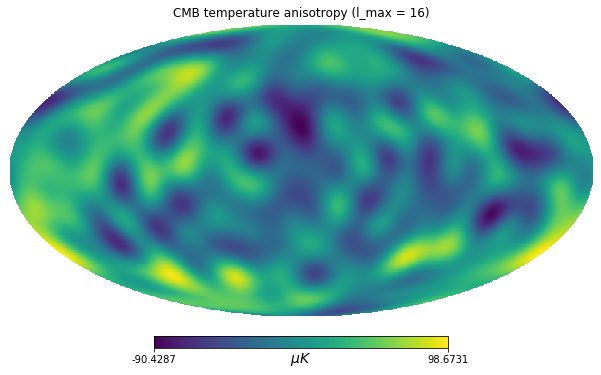

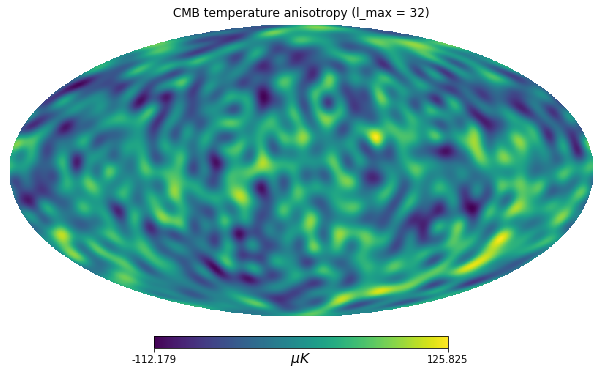

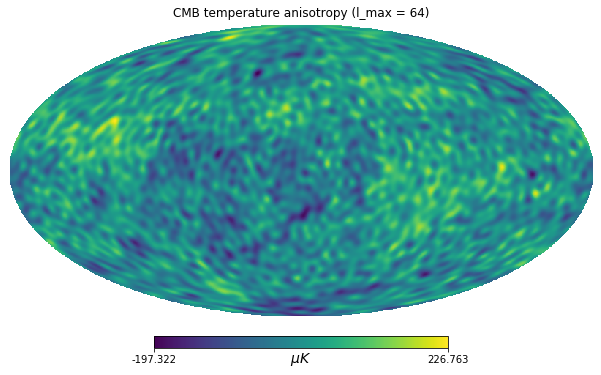

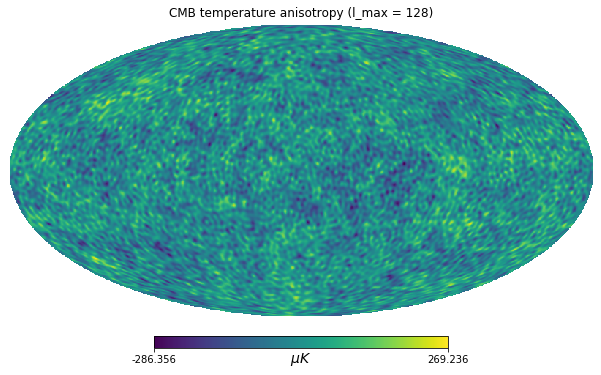

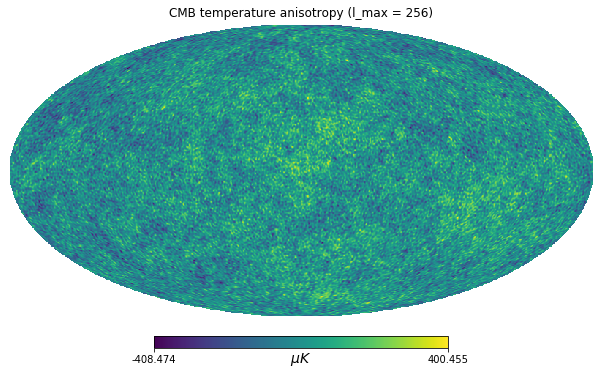

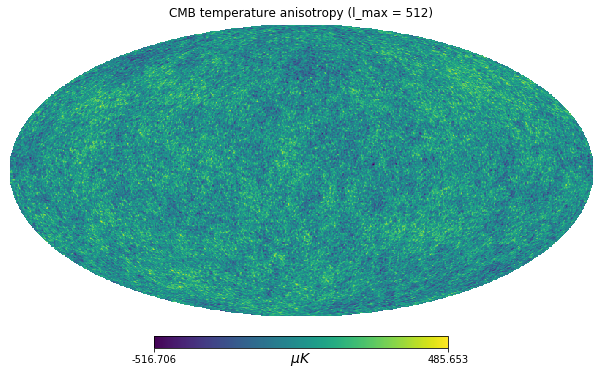

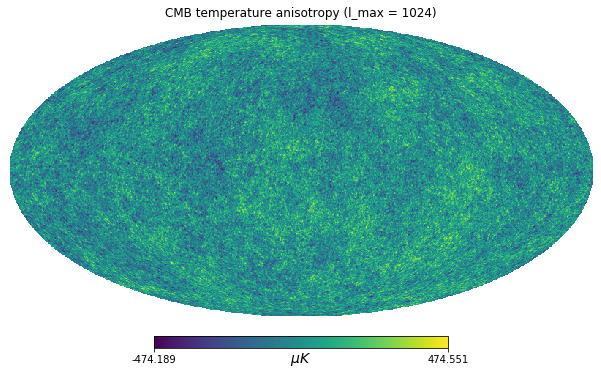

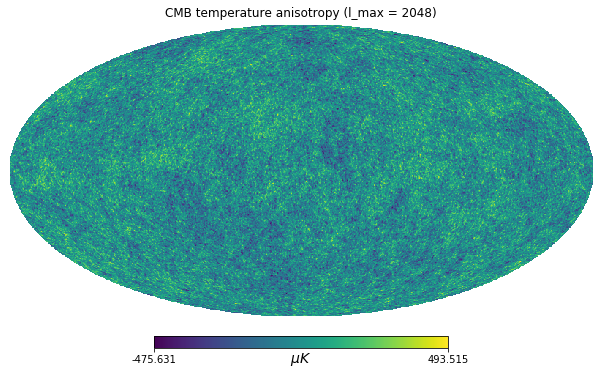

In [5]:
# make an animation about number of c_l in the power spectrum to include
# we will do a for loop to generate each frame of the picture and save them to disk first
# Then we will use ffmpeg tool to combine all the pictures together into an animation 

for iorder in range(12):
    lmax = 2**iorder
    Tmap = hp.synfast(Cl[0:lmax], 512, pol=False, new=True)
    hp.mollview(Tmap, unit='$\mu K$',
                title='CMB temperature anisotropy (l_max = {})'.format(lmax))
    plt.savefig("test_{0:02d}.png".format(iorder))